In [ ]:
# default_exp gbe.rtt.reliability

# Risk Taking Task - Reliability

<div>
    <p style="float: left;"><img src="images/gambling_task.png" alt="Drawing" style="width: 200px; border-right:30px solid white"/>
        </div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)
from trr265 import plotting

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.rtt.data_provider import RTTDataProvider
import trr265.gbe.rtt.scoring as rtt_scoring 
import trr265.stats as stats
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = RTTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_rtt_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")

## Test-retest reliability

### Based on percentage gambles

#### Win

R[write to console]: Loading required package: psych



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.638,4.521,241.0,242.0,0.0,0.571,0.696,".64 (.57, .70)"
Single_random_raters,ICC2,0.638,4.537,241.0,241.0,0.0,0.571,0.697,".64 (.57, .70)"
Single_fixed_raters,ICC3,0.639,4.537,241.0,241.0,0.0,0.572,0.697,".64 (.57, .70)"
Average_raters_absolute,ICC1k,0.779,4.521,241.0,242.0,0.0,0.727,0.821,".78 (.73, .82)"
Average_random_raters,ICC2k,0.779,4.537,241.0,241.0,0.0,0.727,0.821,".78 (.73, .82)"
Average_fixed_raters,ICC3k,0.780,4.537,241.0,241.0,0.0,0.727,0.822,".78 (.73, .82)"


,variance,Percent
ID,0.067,0.638
Items,0.000,0.001
Residual,0.038,0.361
Total,0.105,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


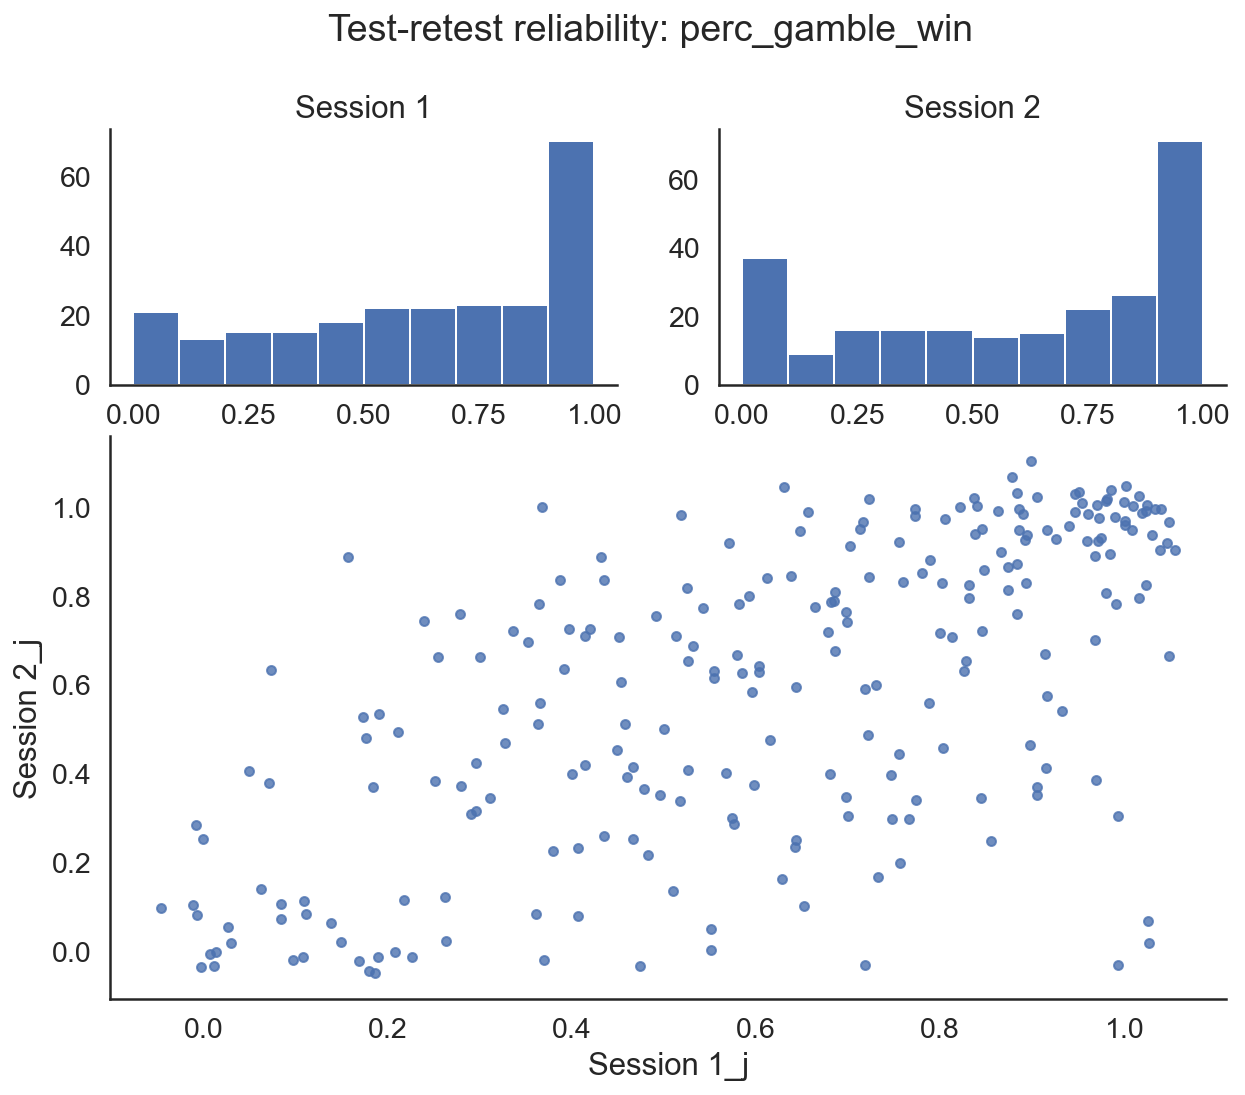

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.577,3.733,241.0,242.0,0.0,0.502,0.644,".58 (.50, .64)"
Single_random_raters,ICC2,0.584,4.026,241.0,241.0,0.0,0.497,0.657,".58 (.50, .66)"
Single_fixed_raters,ICC3,0.602,4.026,241.0,241.0,0.0,0.530,0.665,".60 (.53, .67)"
Average_raters_absolute,ICC1k,0.732,3.733,241.0,242.0,0.0,0.669,0.783,".73 (.67, .78)"
Average_random_raters,ICC2k,0.737,4.026,241.0,241.0,0.0,0.664,0.793,".74 (.66, .79)"
Average_fixed_raters,ICC3k,0.752,4.026,241.0,241.0,0.0,0.693,0.799,".75 (.69, .80)"


,variance,Percent
ID,0.053,0.584
Items,0.003,0.030
Residual,0.035,0.386
Total,0.090,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


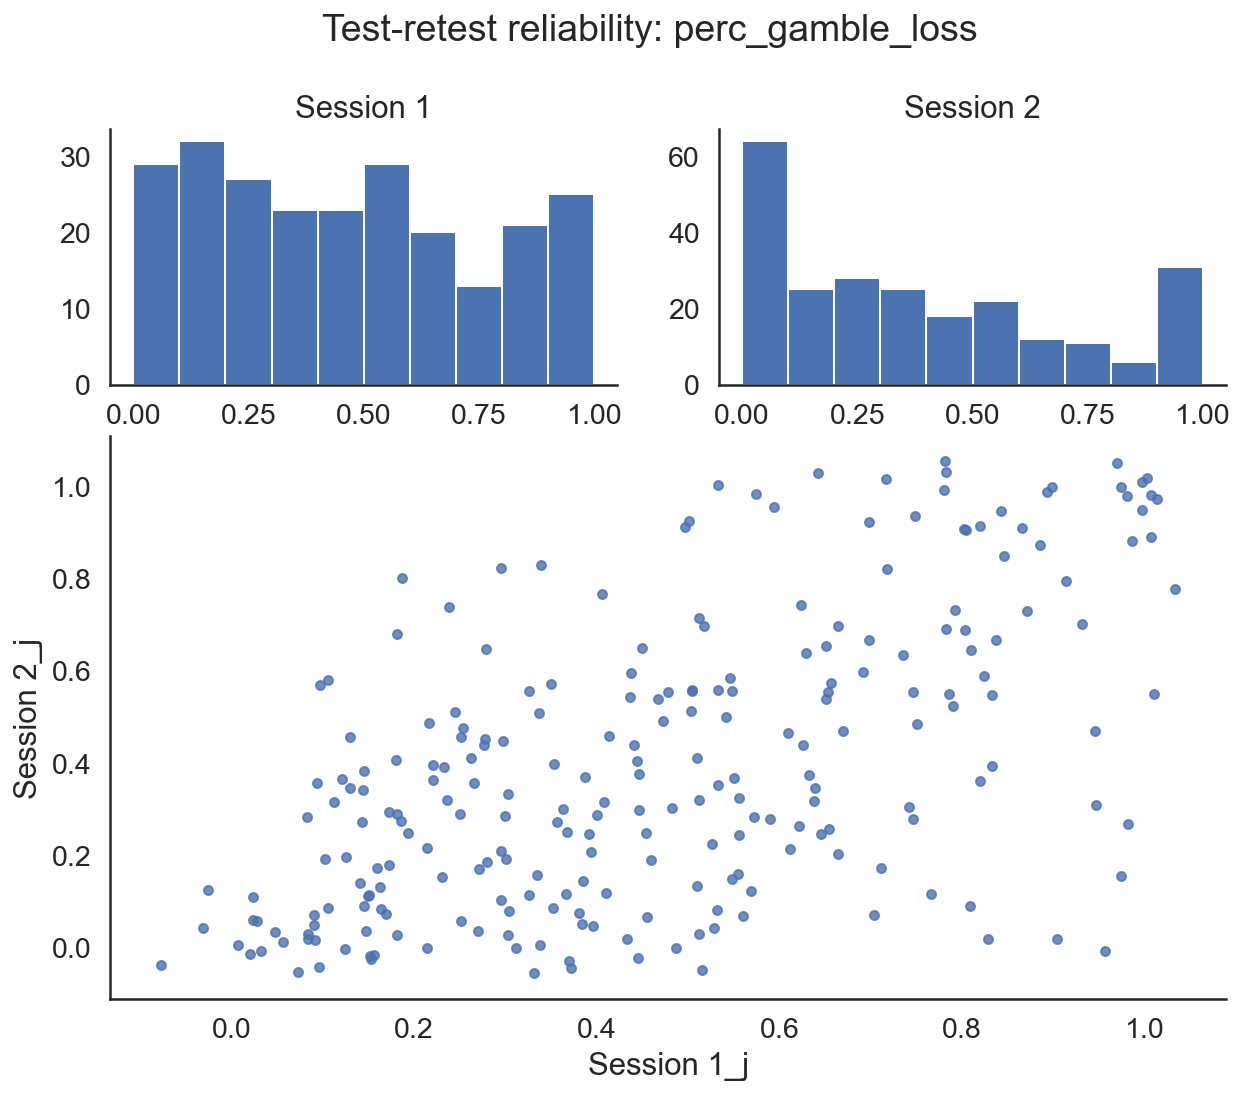

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.542,3.371,241.0,242.0,0.0,0.463,0.613,".54 (.46, .61)"
Single_random_raters,ICC2,0.545,3.467,241.0,241.0,0.0,0.465,0.616,".55 (.47, .62)"
Single_fixed_raters,ICC3,0.552,3.467,241.0,241.0,0.0,0.474,0.622,".55 (.47, .62)"
Average_raters_absolute,ICC1k,0.703,3.371,241.0,242.0,0.0,0.633,0.760,".70 (.63, .76)"
Average_random_raters,ICC2k,0.706,3.467,241.0,241.0,0.0,0.635,0.763,".71 (.64, .76)"
Average_fixed_raters,ICC3k,0.712,3.467,241.0,241.0,0.0,0.643,0.767,".71 (.64, .77)"


,variance,Percent
ID,0.050,0.545
Items,0.001,0.013
Residual,0.040,0.442
Total,0.091,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


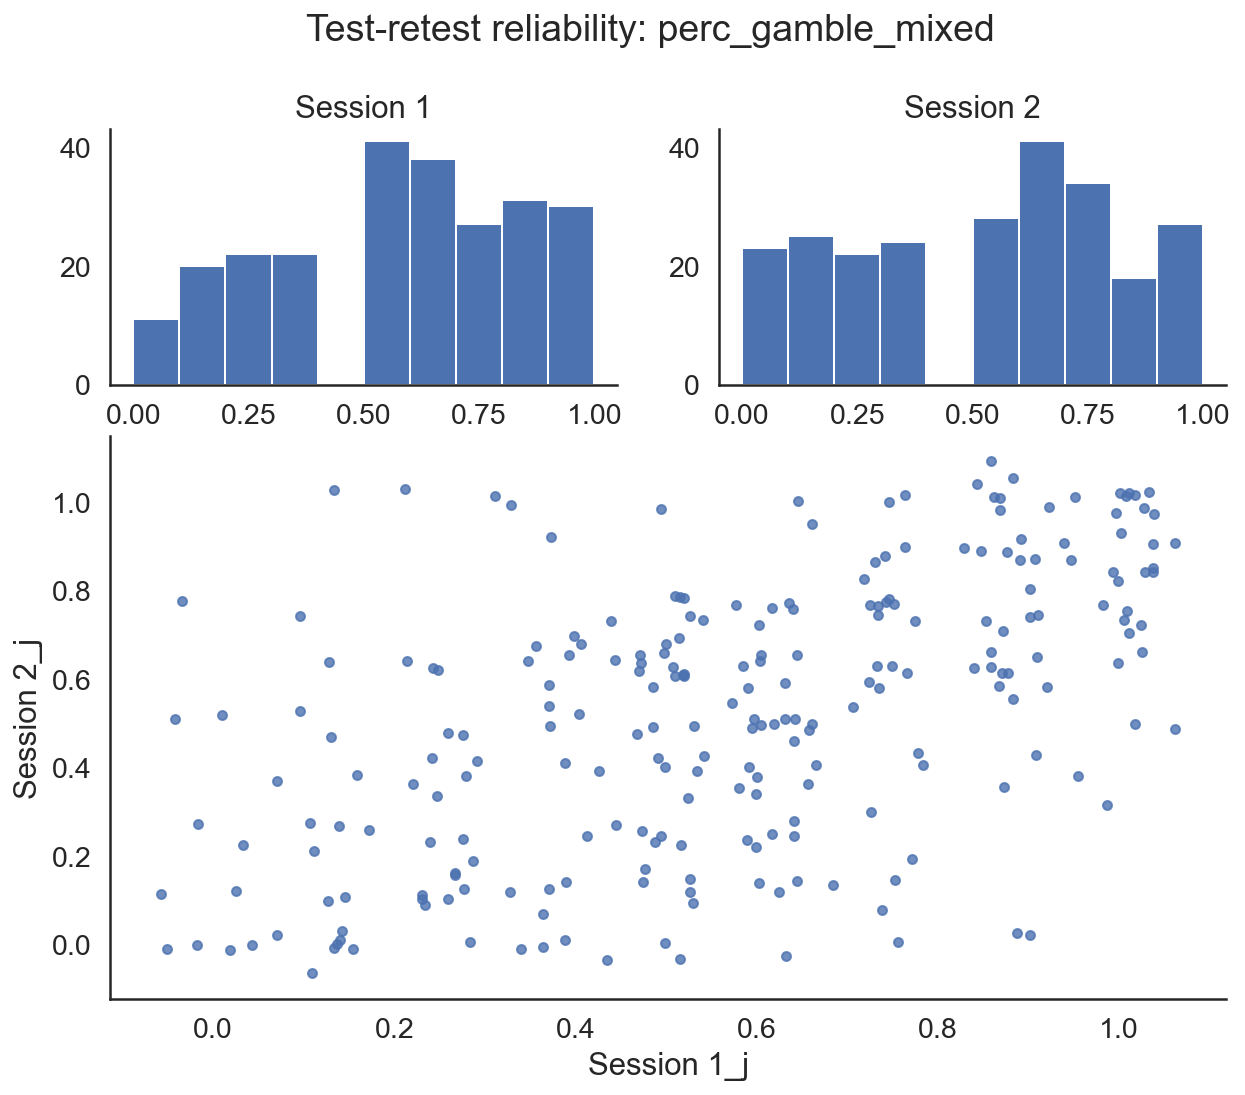

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_mixed', add_jitter = True)

### Based on predicted values (separate models)
Test-retest reliability for scores predicted by separate models for each session (for calculation of scores see `rtt_scoring.get_perc_gamble_predicted_sep`).

#### Win

In [ ]:
_df = rtt_scoring.get_perc_gamble_predicted_sep(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: Loading required package: lme4

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘lmerTest’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer


R[write to console]: The following object is masked from ‘package:stats’:

    step




,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.630,4.400,241.0,242.0,0.0,0.561,0.689,".63 (.56, .69)"
Single_random_raters,ICC2,0.630,4.427,241.0,241.0,0.0,0.562,0.690,".63 (.56, .69)"
Single_fixed_raters,ICC3,0.631,4.427,241.0,241.0,0.0,0.563,0.691,".63 (.56, .69)"
Average_raters_absolute,ICC1k,0.773,4.400,241.0,242.0,0.0,0.719,0.816,".77 (.72, .82)"
Average_random_raters,ICC2k,0.773,4.427,241.0,241.0,0.0,0.719,0.816,".77 (.72, .82)"
Average_fixed_raters,ICC3k,0.774,4.427,241.0,241.0,0.0,0.721,0.817,".77 (.72, .82)"


,variance,Percent
ID,0.051,0.630
Items,0.000,0.002
Residual,0.030,0.368
Total,0.082,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


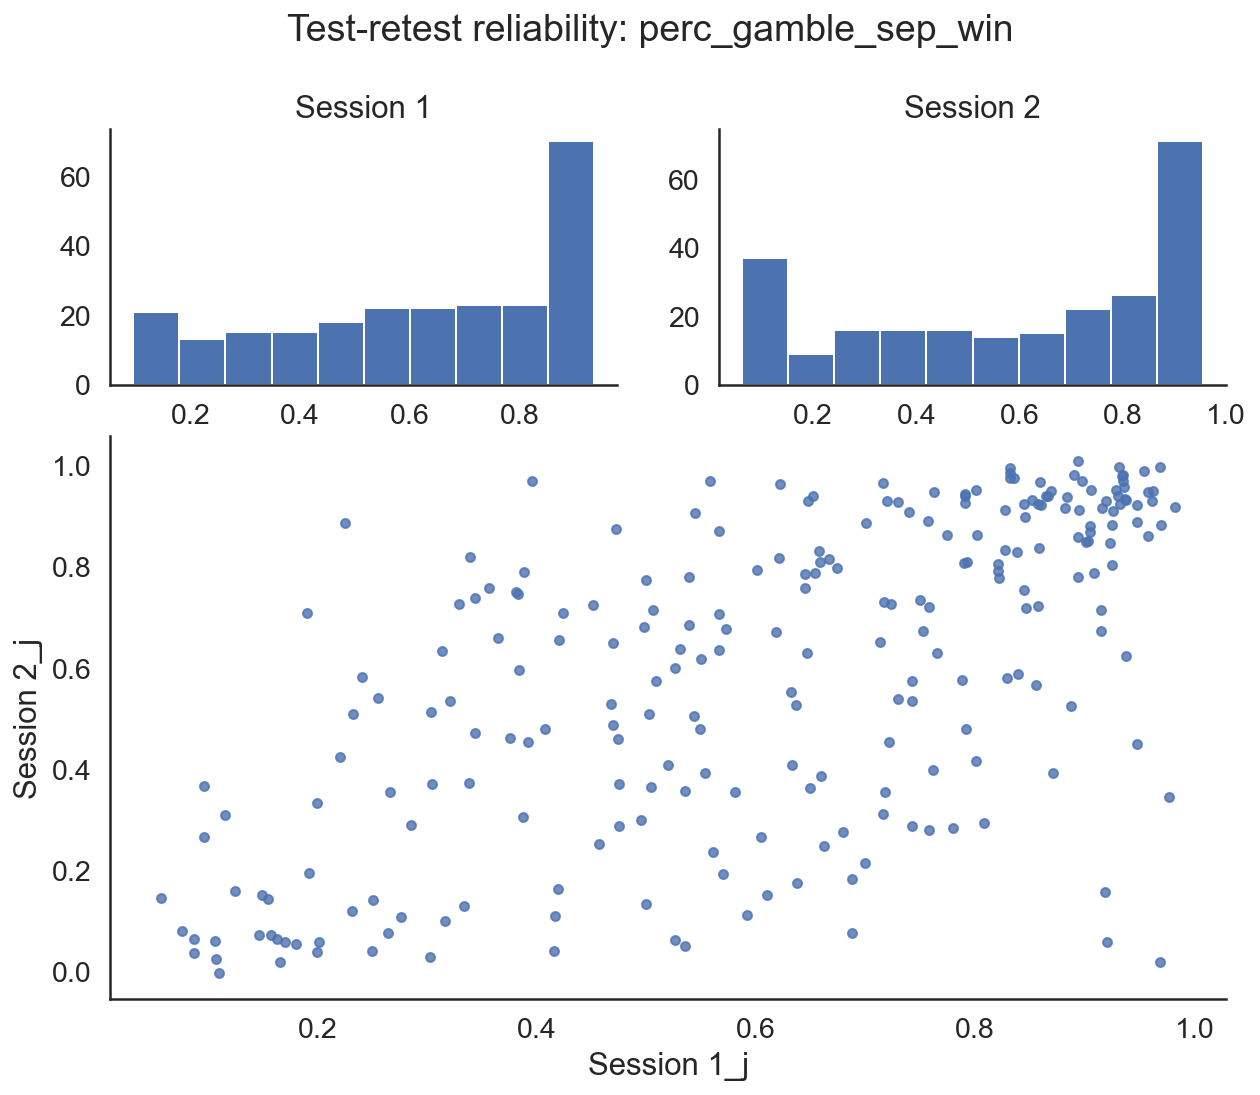

In [ ]:
iccs_trial_sep_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.552,3.468,241.0,242.0,0.0,0.474,0.622,".55 (.47, .62)"
Single_random_raters,ICC2,0.563,3.909,241.0,241.0,0.0,0.458,0.648,".56 (.46, .65)"
Single_fixed_raters,ICC3,0.593,3.909,241.0,241.0,0.0,0.519,0.657,".59 (.52, .66)"
Average_raters_absolute,ICC1k,0.712,3.468,241.0,242.0,0.0,0.644,0.767,".71 (.64, .77)"
Average_random_raters,ICC2k,0.721,3.909,241.0,241.0,0.0,0.628,0.787,".72 (.63, .79)"
Average_fixed_raters,ICC3k,0.744,3.909,241.0,241.0,0.0,0.684,0.793,".74 (.68, .79)"


,variance,Percent
ID,0.035,0.563
Items,0.003,0.049
Residual,0.024,0.387
Total,0.063,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


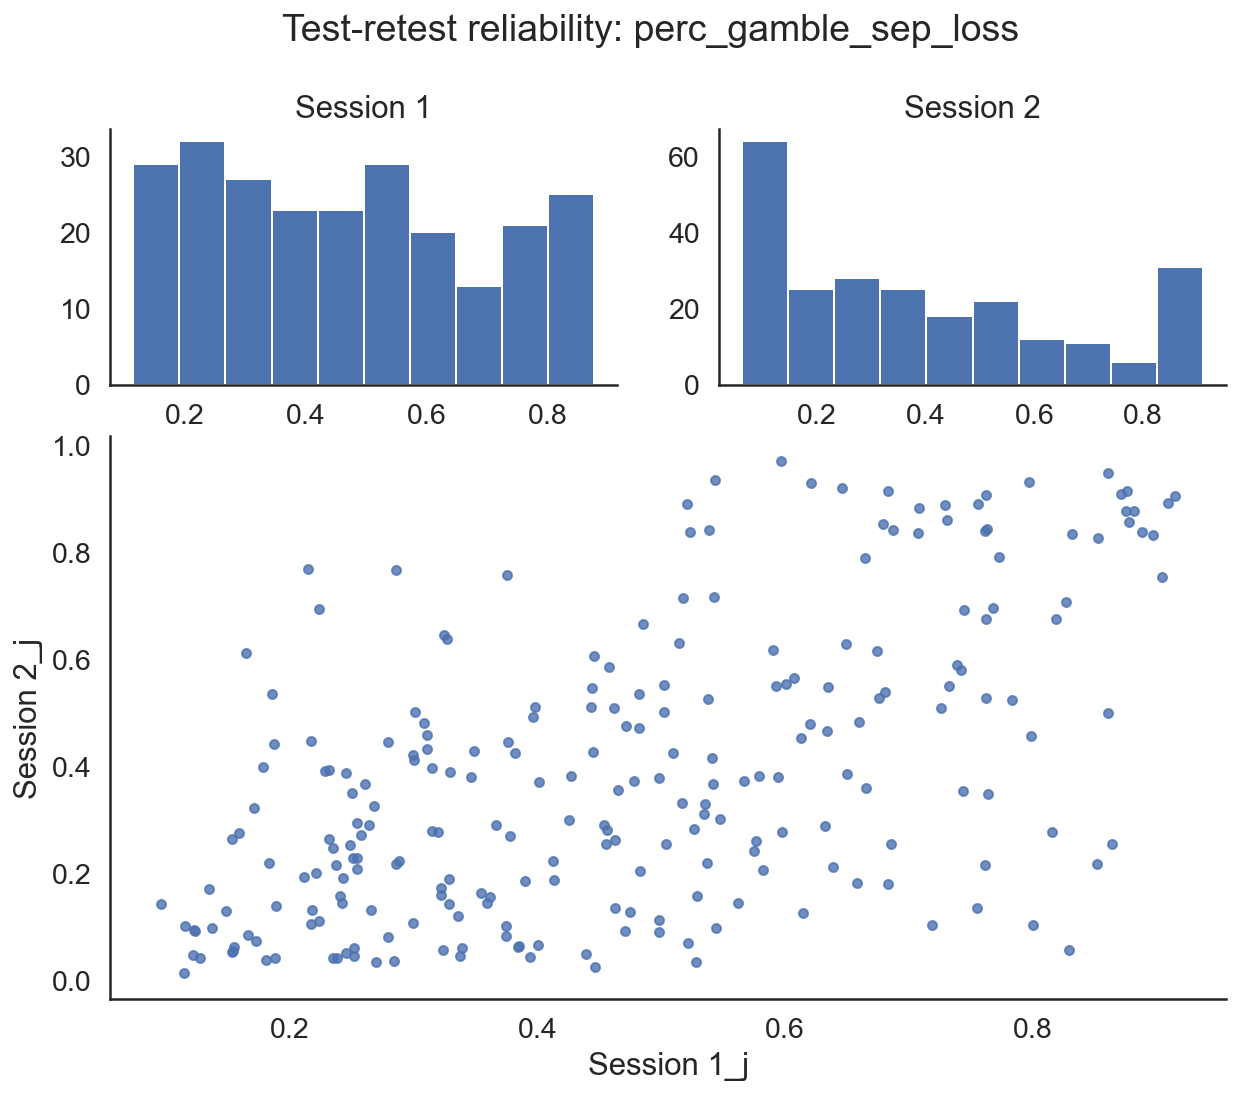

In [ ]:
iccs_trial_sep_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.525,3.212,241.0,242.0,0.0,0.444,0.598,".53 (.44, .60)"
Single_random_raters,ICC2,0.531,3.401,241.0,241.0,0.0,0.445,0.607,".53 (.44, .61)"
Single_fixed_raters,ICC3,0.546,3.401,241.0,241.0,0.0,0.467,0.616,".55 (.47, .62)"
Average_raters_absolute,ICC1k,0.689,3.212,241.0,242.0,0.0,0.615,0.748,".69 (.62, .75)"
Average_random_raters,ICC2k,0.694,3.401,241.0,241.0,0.0,0.616,0.755,".69 (.62, .76)"
Average_fixed_raters,ICC3k,0.706,3.401,241.0,241.0,0.0,0.636,0.762,".71 (.64, .76)"


,variance,Percent
ID,0.028,0.531
Items,0.001,0.026
Residual,0.023,0.443
Total,0.052,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


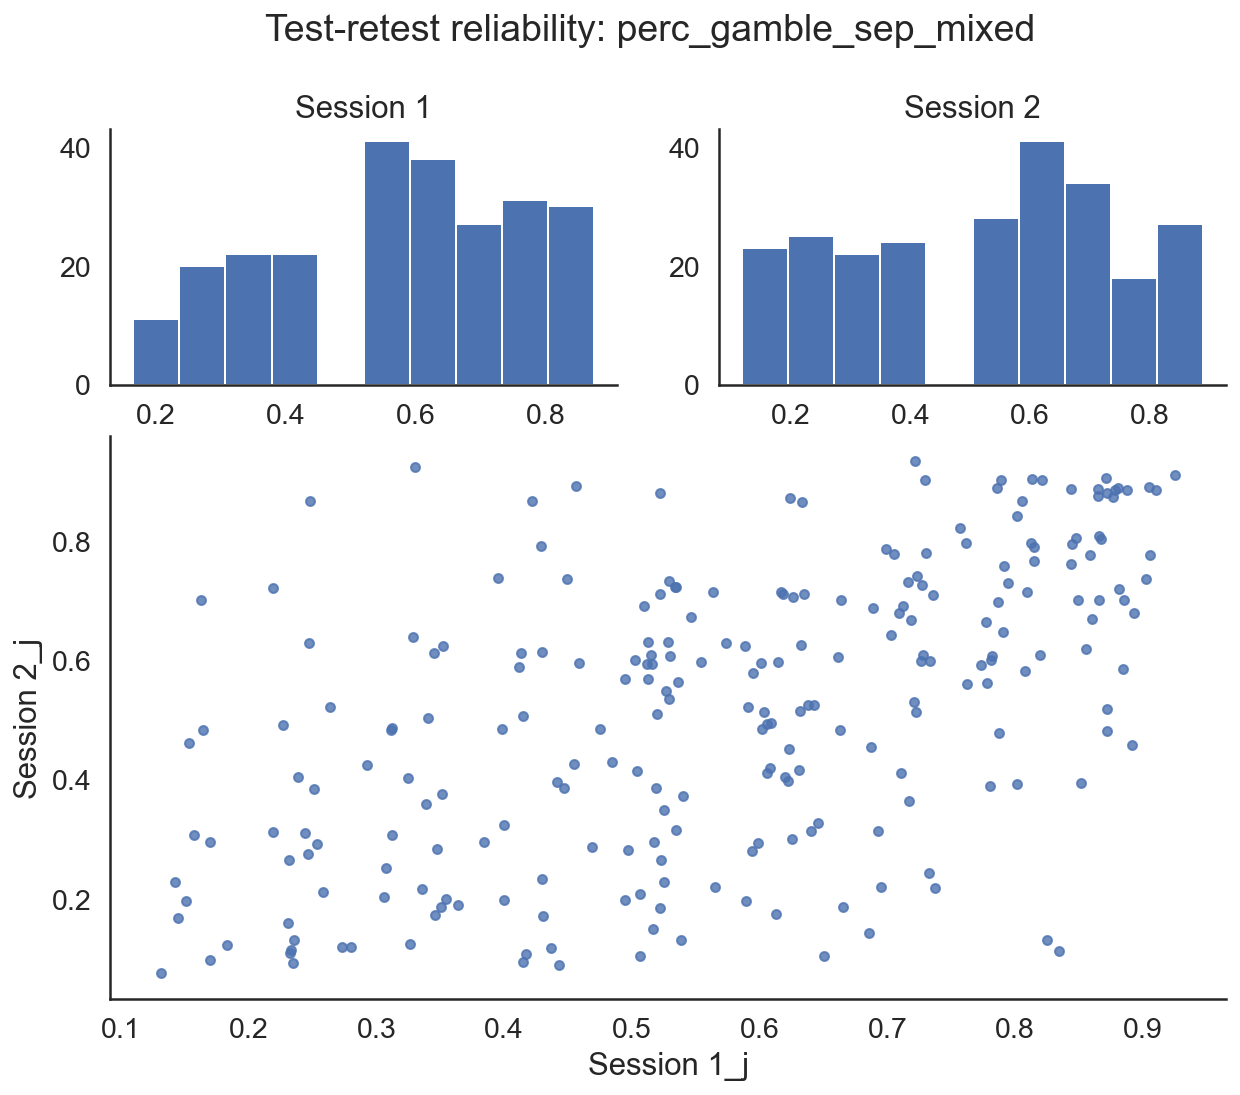

In [ ]:
iccs_trial_sep_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_mixed', add_jitter = True)

### Based on predicted values (joint model)
Test-retest reliability for scores predicted by a joint model (for calculation of scores see `rtt_scoring.get_perc_gamble_predicted_joint`).

#### Win

In [ ]:
_df, ms = rtt_scoring.get_perc_gamble_predicted_joint(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.805,9.263,241.0,242.0,0.0,0.765,0.839,".81 (.76, .84)"
Single_random_raters,ICC2,0.805,9.306,241.0,241.0,0.0,0.765,0.839,".81 (.76, .84)"
Single_fixed_raters,ICC3,0.806,9.306,241.0,241.0,0.0,0.765,0.840,".81 (.77, .84)"
Average_raters_absolute,ICC1k,0.892,9.263,241.0,242.0,0.0,0.867,0.913,".89 (.87, .91)"
Average_random_raters,ICC2k,0.892,9.306,241.0,241.0,0.0,0.867,0.913,".89 (.87, .91)"
Average_fixed_raters,ICC3k,0.893,9.306,241.0,241.0,0.0,0.867,0.913,".89 (.87, .91)"


,variance,Percent
ID,0.066,0.805
Items,0.000,0.001
Residual,0.016,0.194
Total,0.082,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


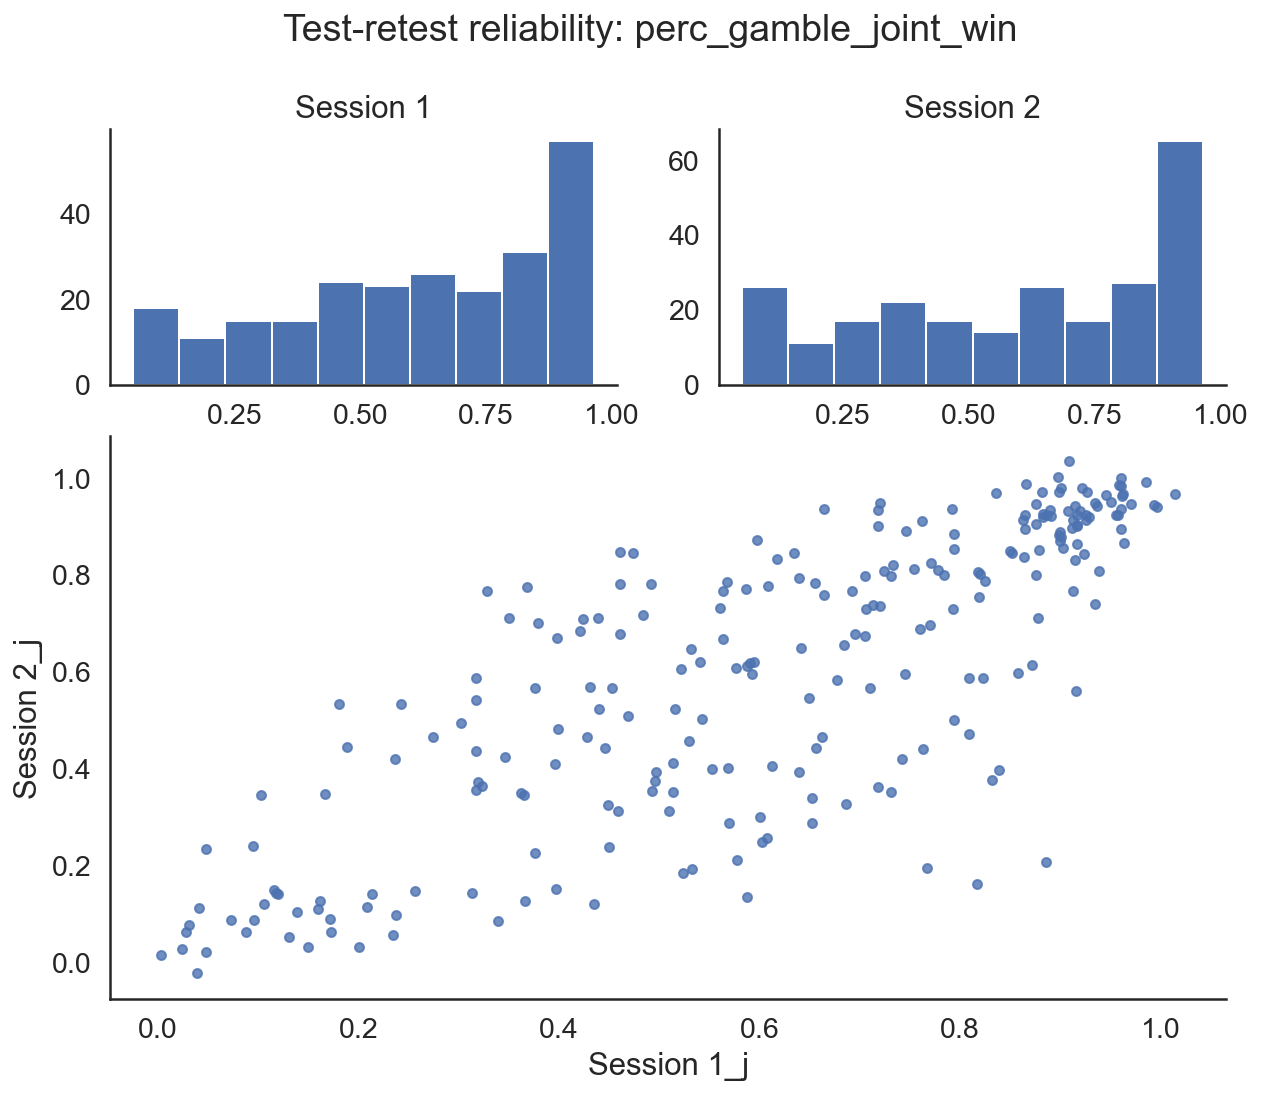

In [ ]:
iccs_trial_joint_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.797,8.844,241.0,242.0,0.0,0.755,0.832,".80 (.75, .83)"
Single_random_raters,ICC2,0.798,9.508,241.0,241.0,0.0,0.746,0.839,".80 (.75, .84)"
Single_fixed_raters,ICC3,0.810,9.508,241.0,241.0,0.0,0.770,0.843,".81 (.77, .84)"
Average_raters_absolute,ICC1k,0.887,8.844,241.0,242.0,0.0,0.860,0.909,".89 (.86, .91)"
Average_random_raters,ICC2k,0.888,9.508,241.0,241.0,0.0,0.854,0.913,".89 (.85, .91)"
Average_fixed_raters,ICC3k,0.895,9.508,241.0,241.0,0.0,0.870,0.915,".89 (.87, .91)"


,variance,Percent
ID,0.050,0.798
Items,0.001,0.014
Residual,0.012,0.188
Total,0.062,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


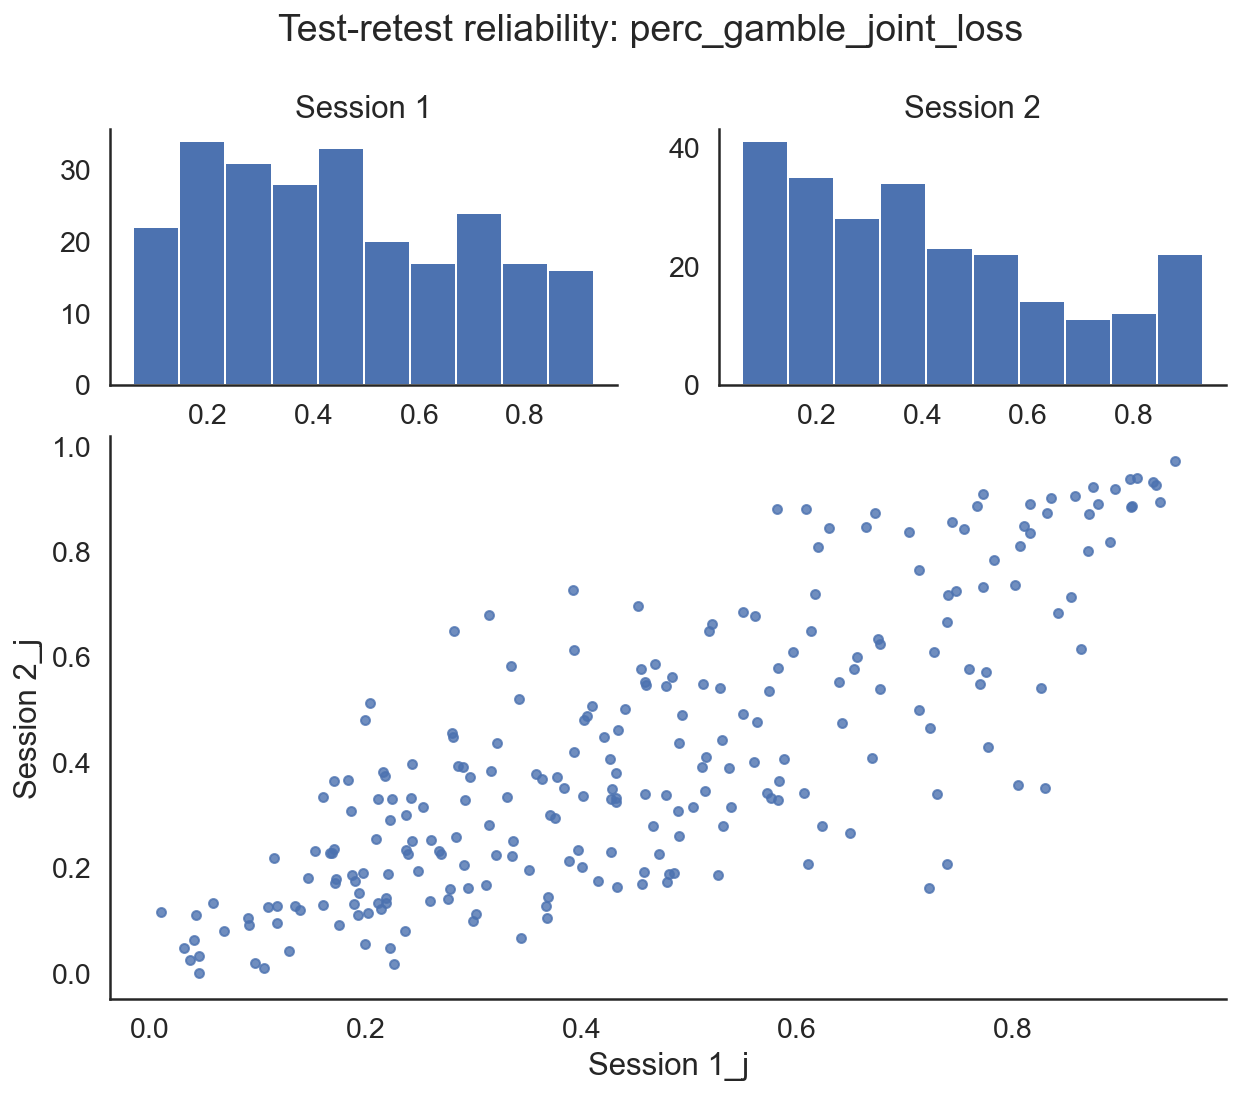

In [ ]:
iccs_trial_joint_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.851,12.463,241.0,242.0,0.0,0.820,0.878,".85 (.82, .88)"
Single_random_raters,ICC2,0.852,12.784,241.0,241.0,0.0,0.819,0.879,".85 (.82, .88)"
Single_fixed_raters,ICC3,0.855,12.784,241.0,241.0,0.0,0.824,0.881,".85 (.82, .88)"
Average_raters_absolute,ICC1k,0.920,12.463,241.0,242.0,0.0,0.901,0.935,".92 (.90, .94)"
Average_random_raters,ICC2k,0.920,12.784,241.0,241.0,0.0,0.900,0.936,".92 (.90, .94)"
Average_fixed_raters,ICC3k,0.922,12.784,241.0,241.0,0.0,0.903,0.937,".92 (.90, .94)"


,variance,Percent
ID,0.045,0.852
Items,0.000,0.004
Residual,0.008,0.145
Total,0.053,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


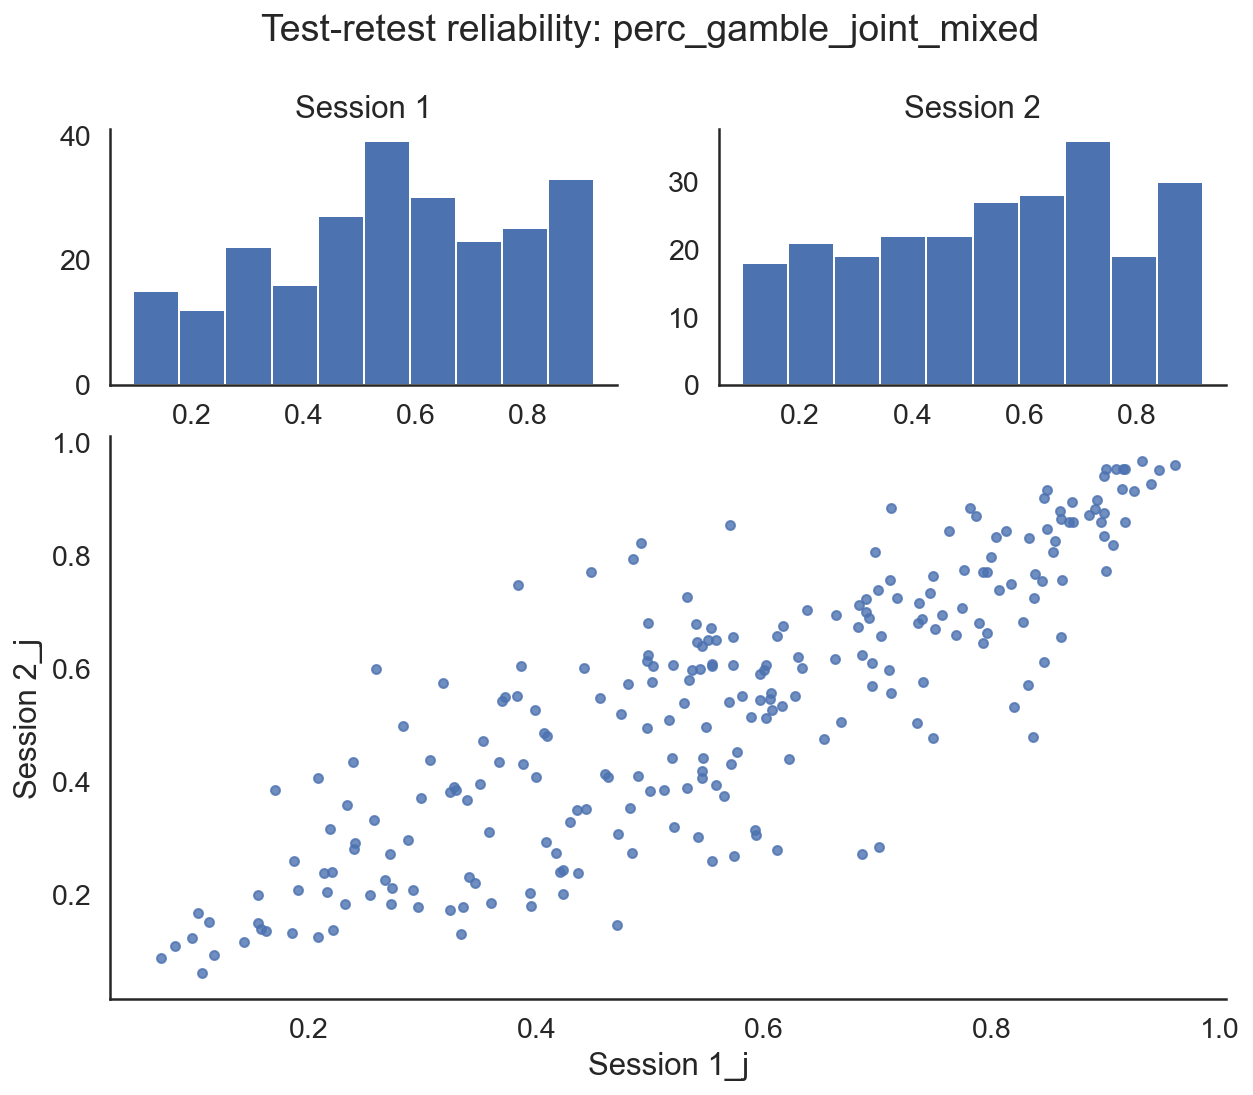

In [ ]:
iccs_trial_joint_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_mixed', add_jitter = True)

### Based on model-calculated variances

#### Win

In [ ]:
iccs_mod_win = stats.get_model_calculated_icc(ms['win'])
iccs_mod_win['icc']

R[write to console]: Loading required package: insight



0.7820300204318491

#### Loss

In [ ]:
iccs_mod_loss = stats.get_model_calculated_icc(ms['loss'])
iccs_mod_loss['icc']

0.7306685794528605

#### Win

In [ ]:
iccs_mod_mixed = stats.get_model_calculated_icc(ms['mixed'])
iccs_mod_mixed['icc']

0.7607750361326122

## Comparison of methods

### All methods

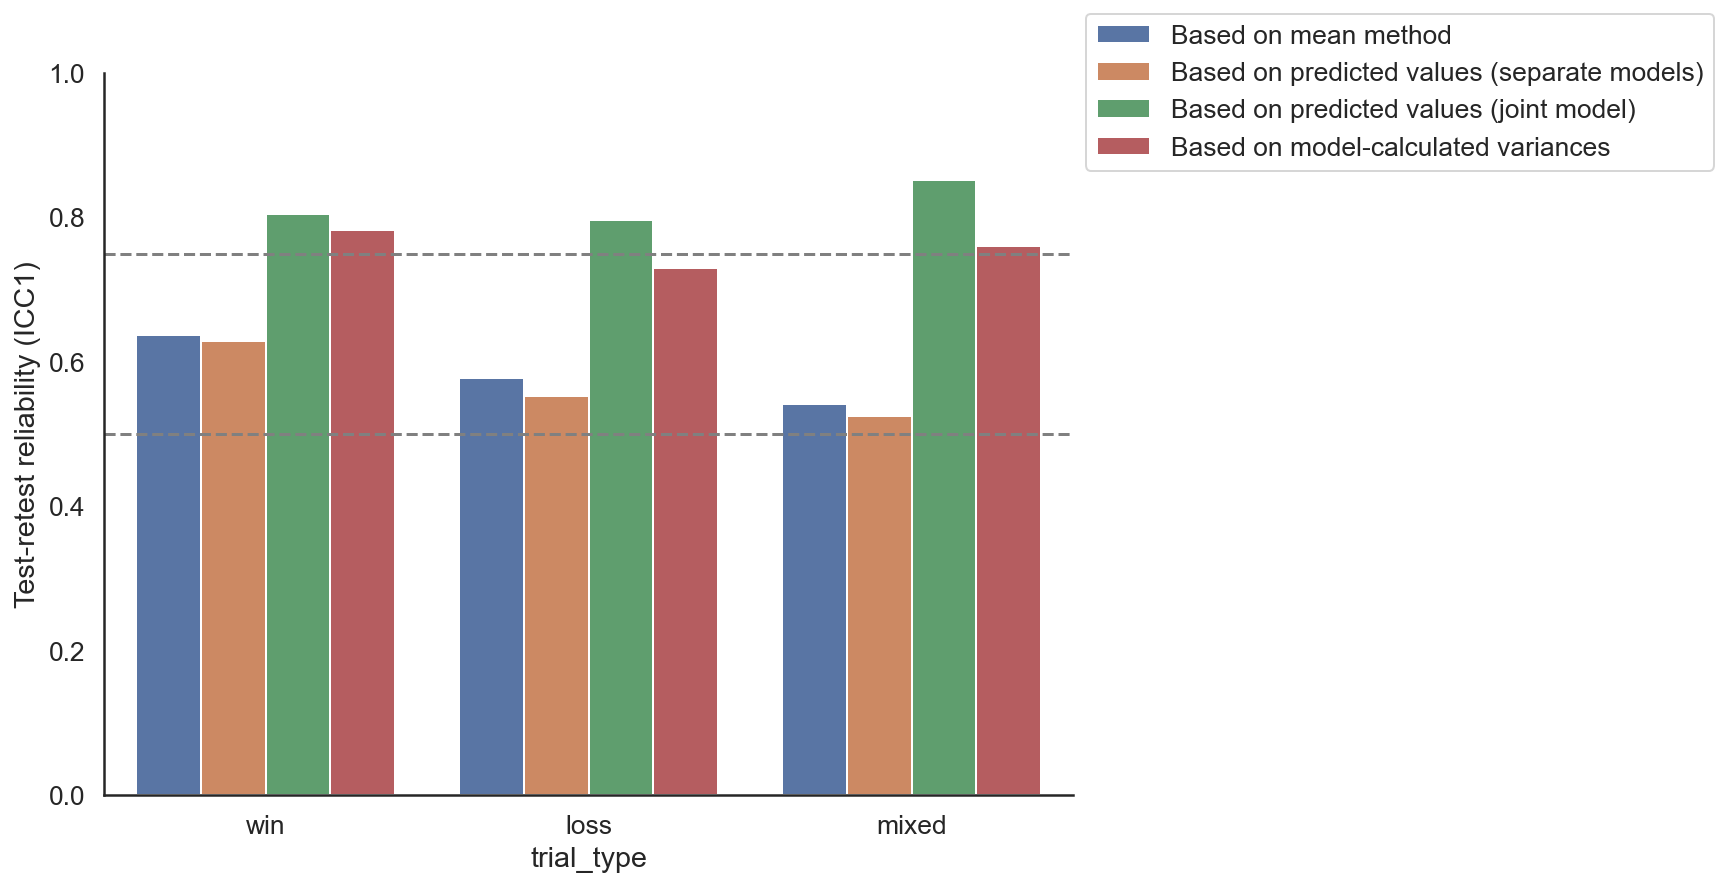

In [ ]:
iccs = {
    "Based on mean method_win": iccs_mean_win,
    "Based on mean method_loss": iccs_mean_loss,
    "Based on mean method_mixed": iccs_mean_mixed,
    "trial_sep_win": iccs_trial_sep_win,
    "trial_sep_loss": iccs_trial_sep_loss,
    "trial_sep_mixed": iccs_trial_sep_mixed,
    "trial_joint_win": iccs_trial_joint_win,
    "trial_joint_loss": iccs_trial_joint_loss,
    "trial_joint_mixed": iccs_trial_joint_mixed,
    "model_calc_win": iccs_mod_win,
    "model_calc_loss": iccs_mod_loss,
    "model_calc_mixed": iccs_mod_mixed
}

g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 3.5, font_scale = 1.2)

### Selected methods for manuscript

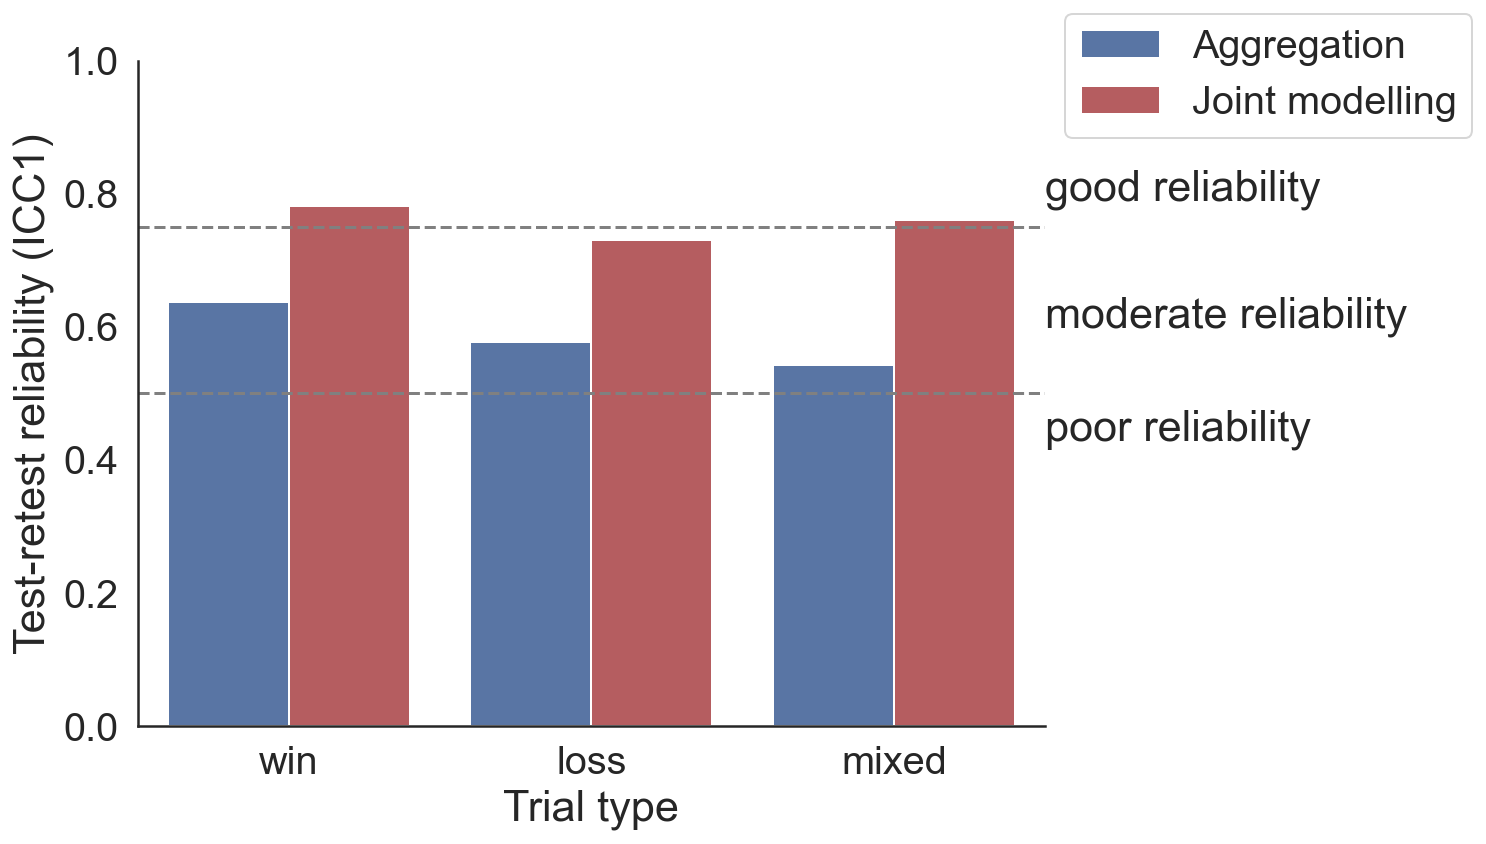

In [ ]:
iccs = {
    "Aggregation_win": iccs_mean_win,
    "Aggregation_loss": iccs_mean_loss,
    "Aggregation_mixed": iccs_mean_mixed,
    "Joint modelling_win": iccs_mod_win,
    "Joint modelling_loss": iccs_mod_loss,
    "Joint modelling_mixed": iccs_mod_mixed
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = 1.3,
                       qualitative_labels = True,
                       x_offset = 2.5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('Trial type');


## Variance proportions

### Win

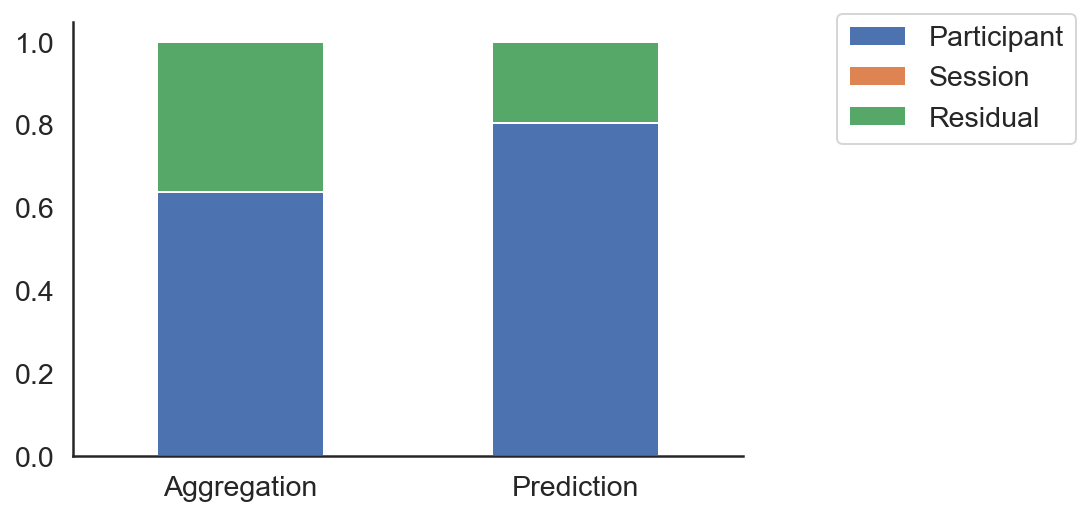

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_win,'Prediction':iccs_trial_joint_win})
#ax.get_legend().remove()

### Loss

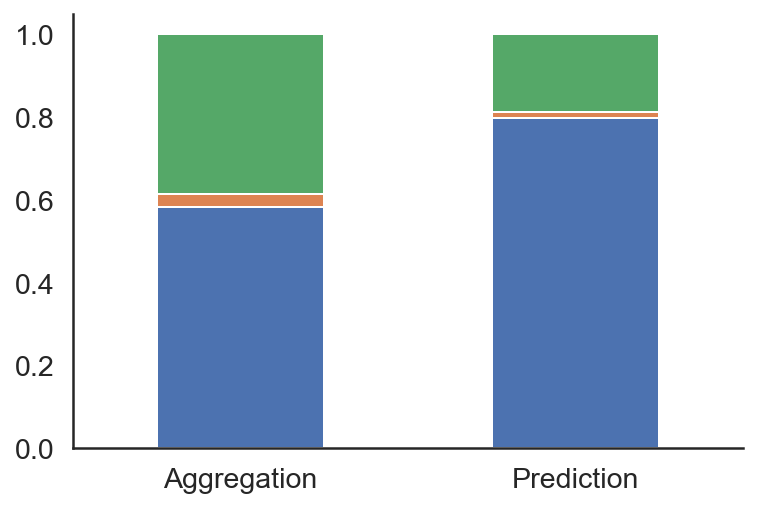

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_loss,'Prediction':iccs_trial_joint_loss})
ax.get_legend().remove()

### Mixed

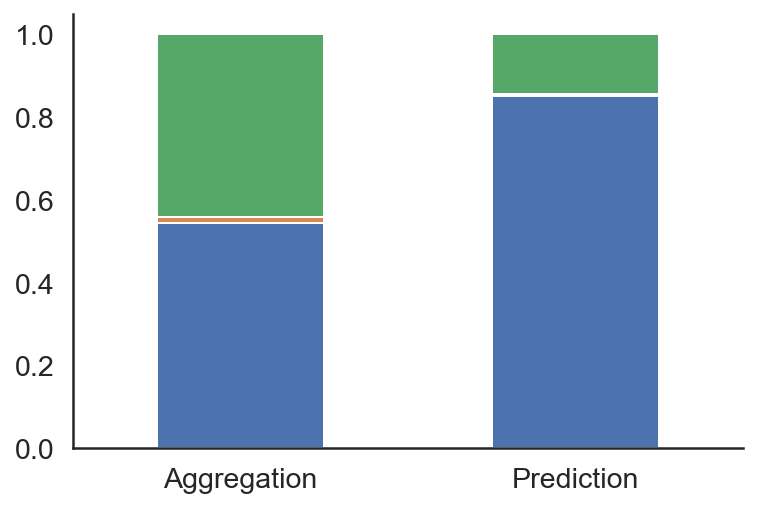

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_mixed,'Prediction':iccs_trial_joint_mixed})
ax.get_legend().remove()

## Effect of time

In [ ]:
gbe = dp.get_gbe_data()

In [ ]:
scores = stats.get_scores(dp, dp.get_rtt_data, rtt_scoring.get_perc_gamble_predicted_joint)

### Win

N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



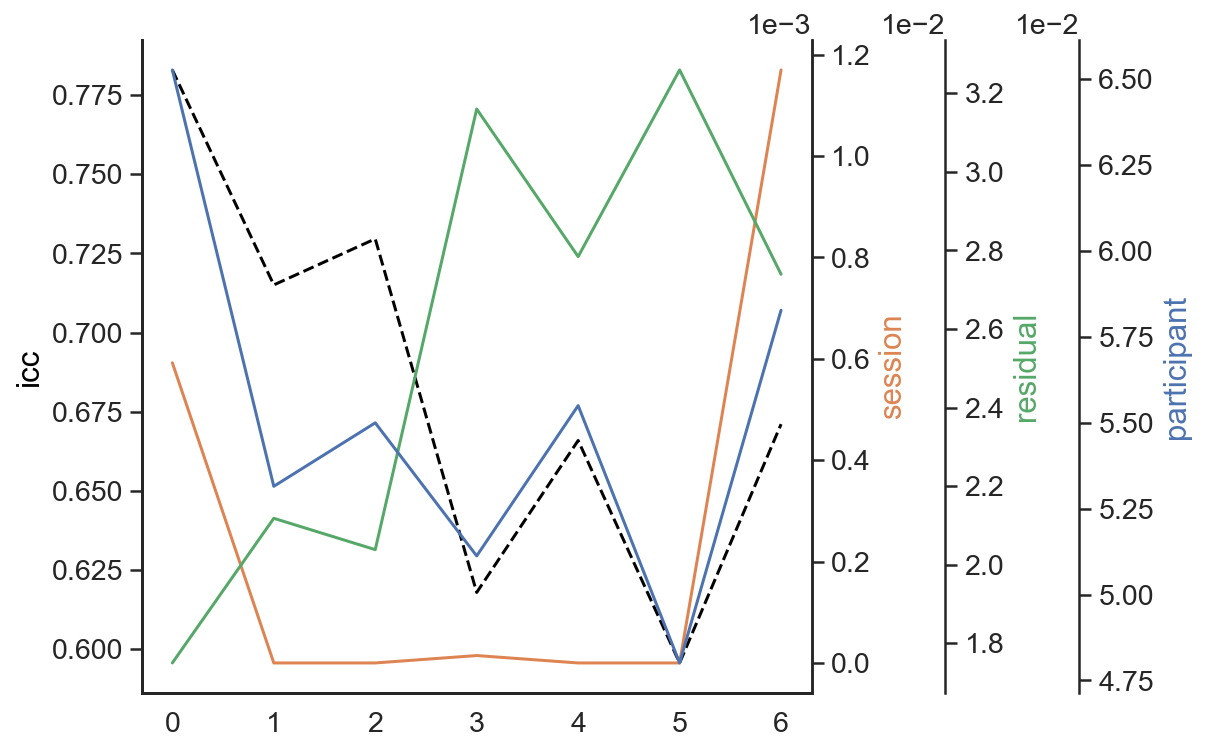

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = False)
ax.figure.set_size_inches(6, 6)

N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



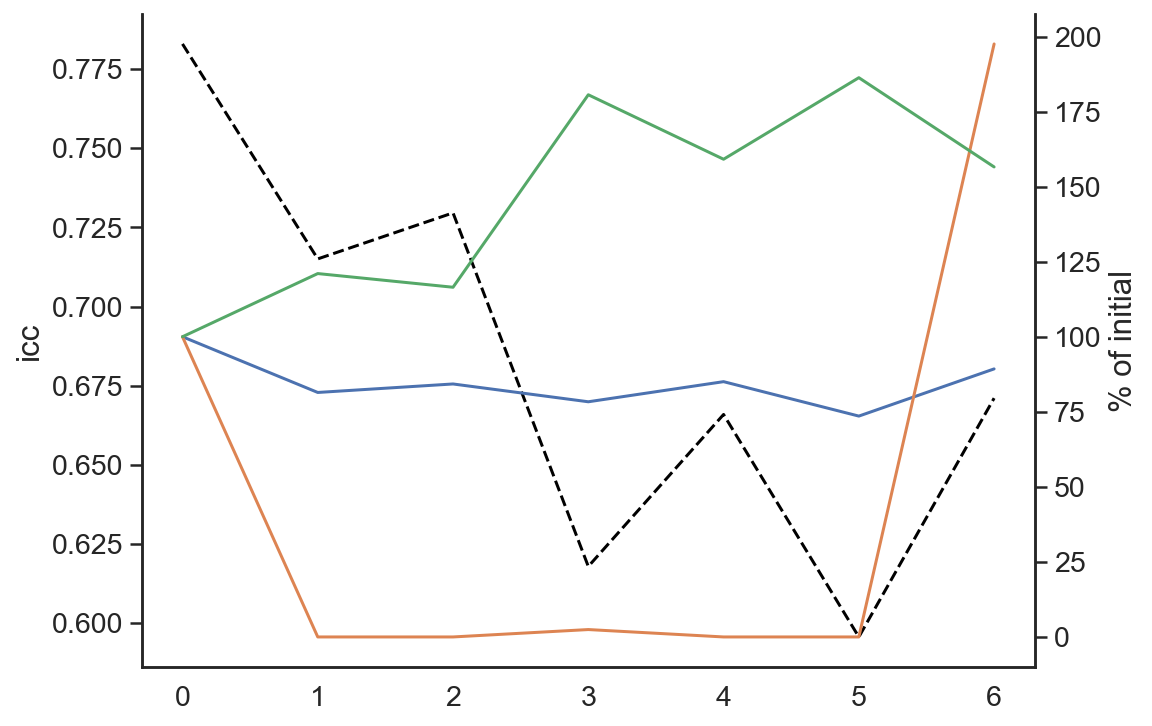

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular



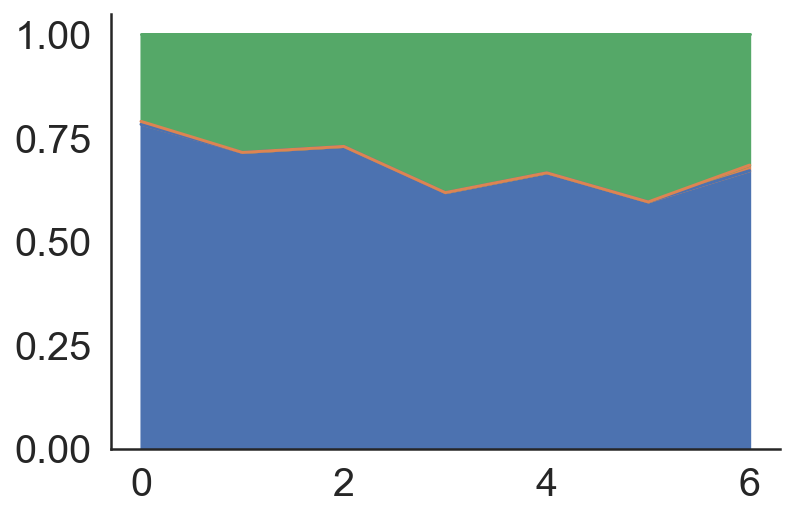

In [ ]:
stats.plot_time_effect(scores, 8, "perc_gamble_joint_win")

### Loss

N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



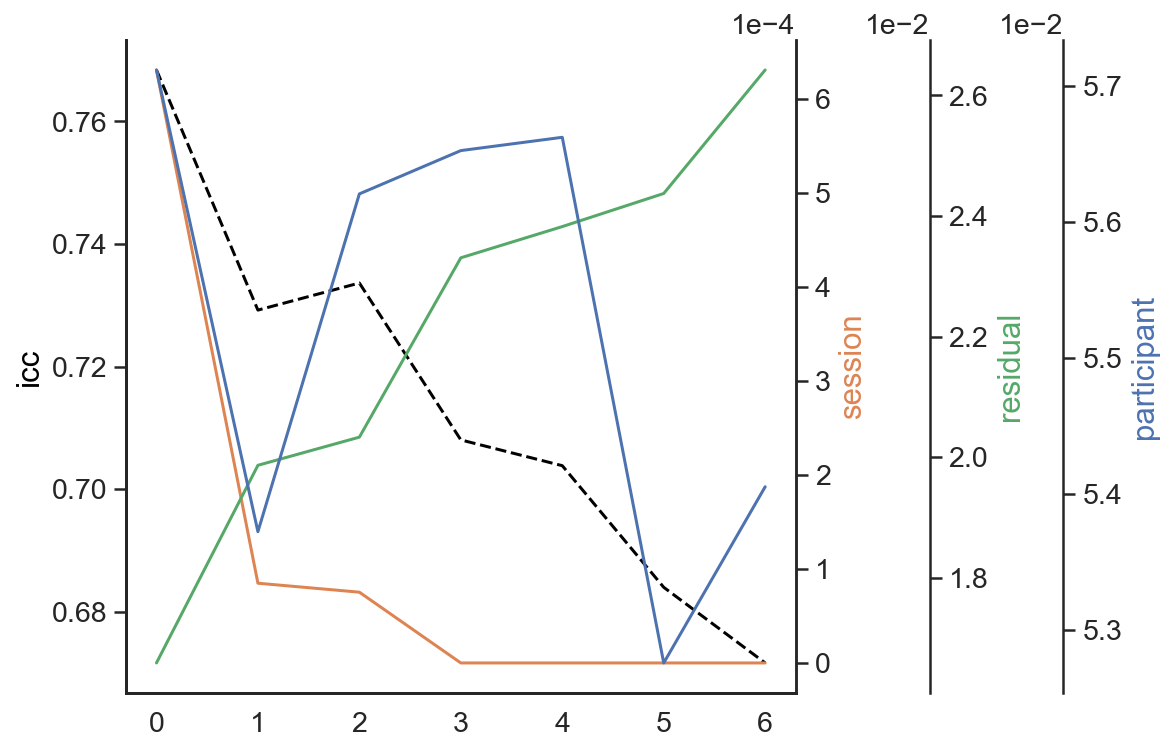

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = False)
ax.figure.set_size_inches(6, 6)

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



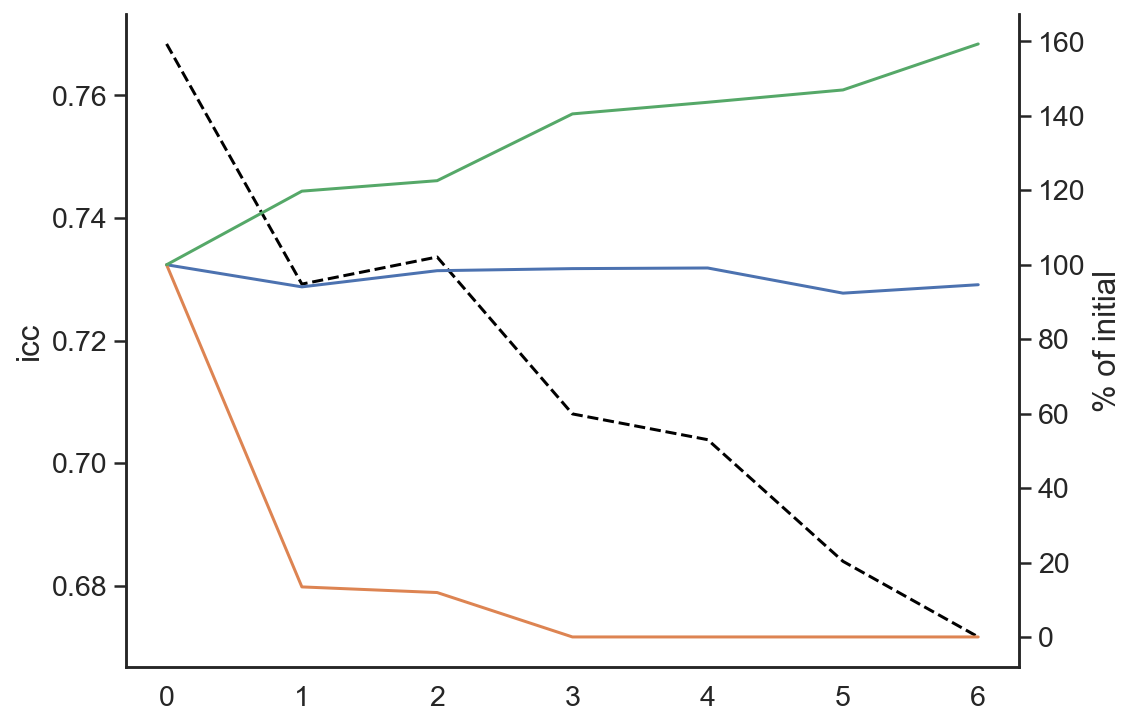

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



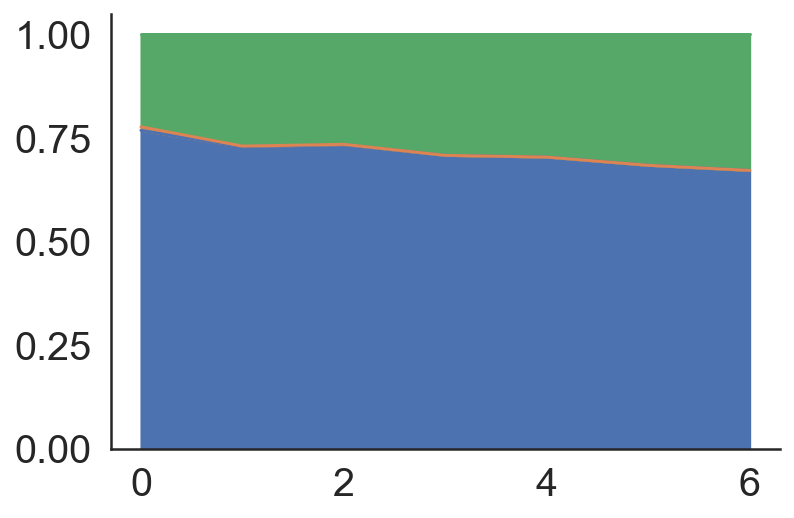

In [ ]:
stats.plot_time_effect(scores, 8, "perc_gamble_joint_loss")

### Mixed

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



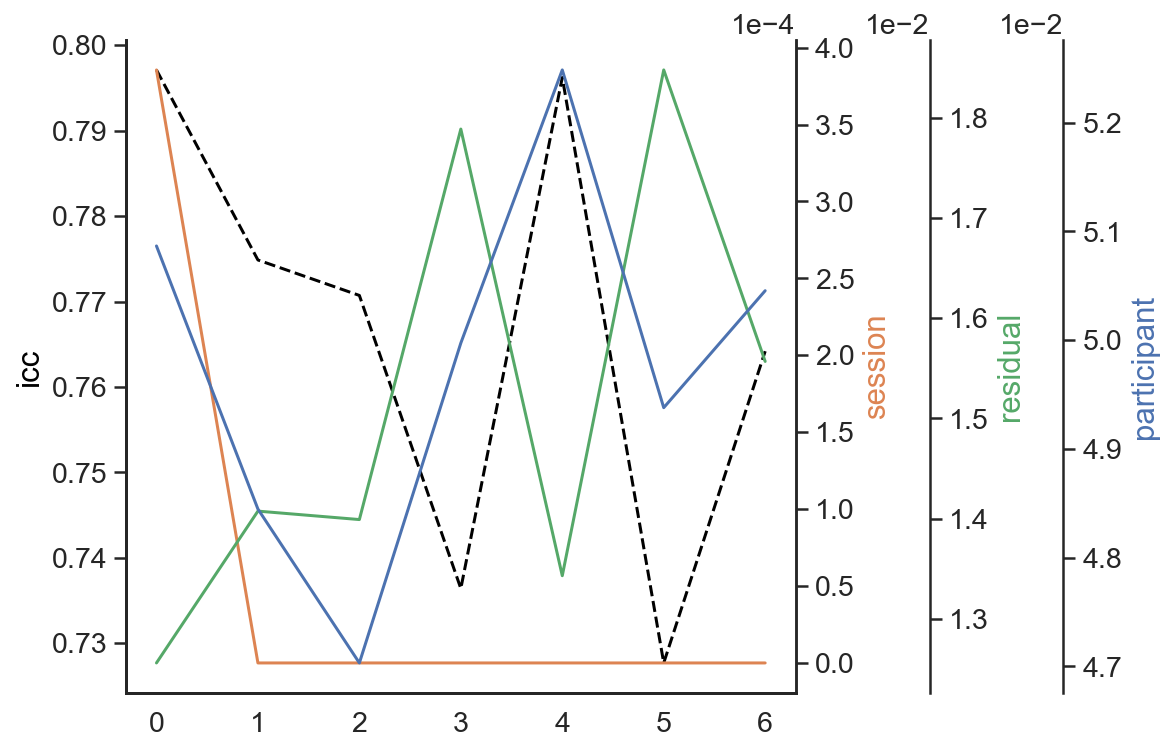

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = False)
ax.figure.set_size_inches(6, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



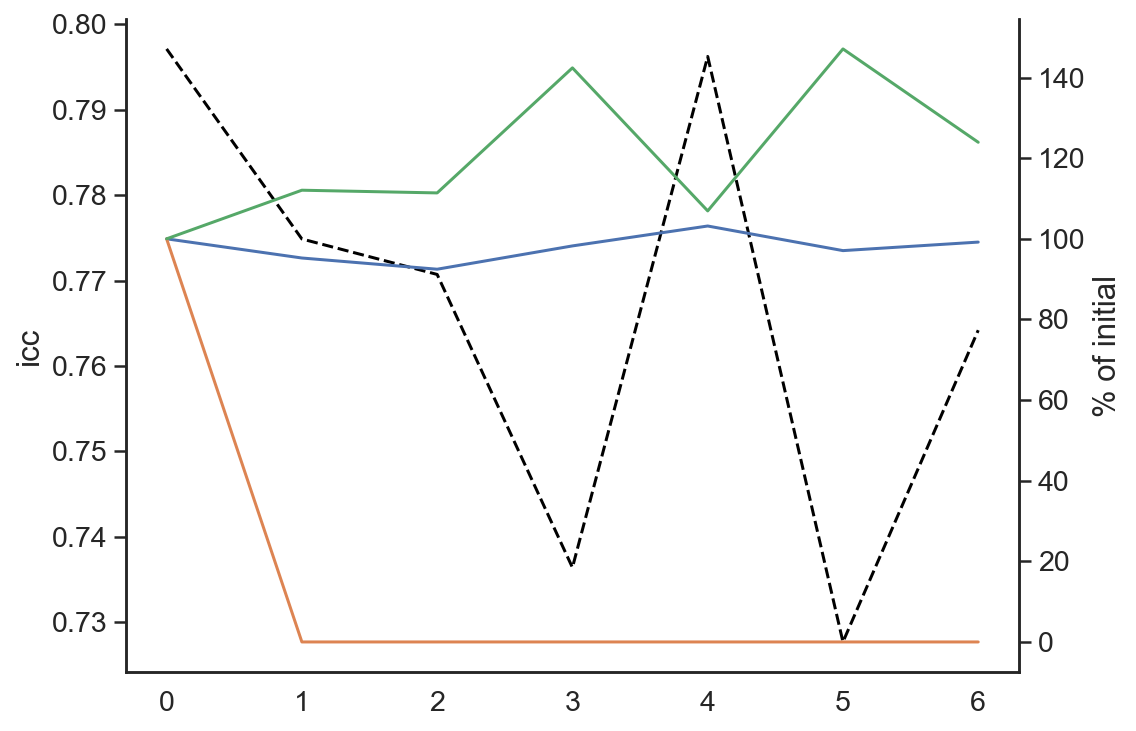

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



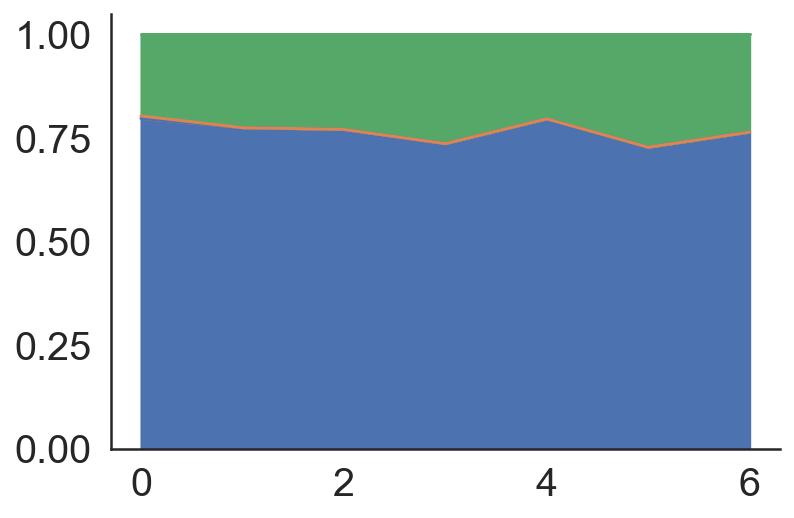

In [ ]:
stats.plot_time_effect(scores, 8, "perc_gamble_joint_mixed")

## Effect of time (percentage change)

In [ ]:


def get_icc_and_variance(_df,
            dependent,
           icc_type = 'ICC2', scaling = 'Percent'): 
    '''Helper function that gets ICCs and variances'''
    outcomes = stats.analyze_reliability(_df, dependent = dependent, silent = True)['iccs']
    icc = outcomes[0].query('type=="%s"'%icc_type)['ICC'].iloc[0]
    variances = outcomes[1].T
    variances.columns = ['Participant','Session','Residual','Total']
    variances = variances.loc[scaling]
    return icc,variances.loc['Participant'],variances.loc['Session'],variances.loc['Residual']


def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent', change = False):
    time_data = []
    # Checking which participants have all sessions
    pps = _df.query('session_number<%d'%(sessions+1)).groupby('participant')[_df.columns[0]].agg(lambda x: len(x.dropna()))==sessions
    pps = pps[pps].index
    print("N = %d"%(len(pps)))

    for i in range(sessions-1):
        session_filter = "(session_number==1) or (session_number==%d)"%(i+2)
        __df = _df.query(session_filter)
        __df = __df[__df.participant.isin(pps)]
        d = {}
        d['icc'],d['participant'],d['session'],d['residual'] = get_icc_and_variance(__df, dependent, scaling = scaling)
        time_data.append(d)
    df = pd.DataFrame(time_data, index = pd.Series(range(sessions-1)))
    if change:
        df = (df/df.iloc[0])*100
    ax = df[['participant','session','residual']].plot(legend = legend)
    ax.figure.legend(bbox_to_anchor=[1.4, 1])
    ax.xaxis.get_major_locator().set_params(integer=True)

### Win

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



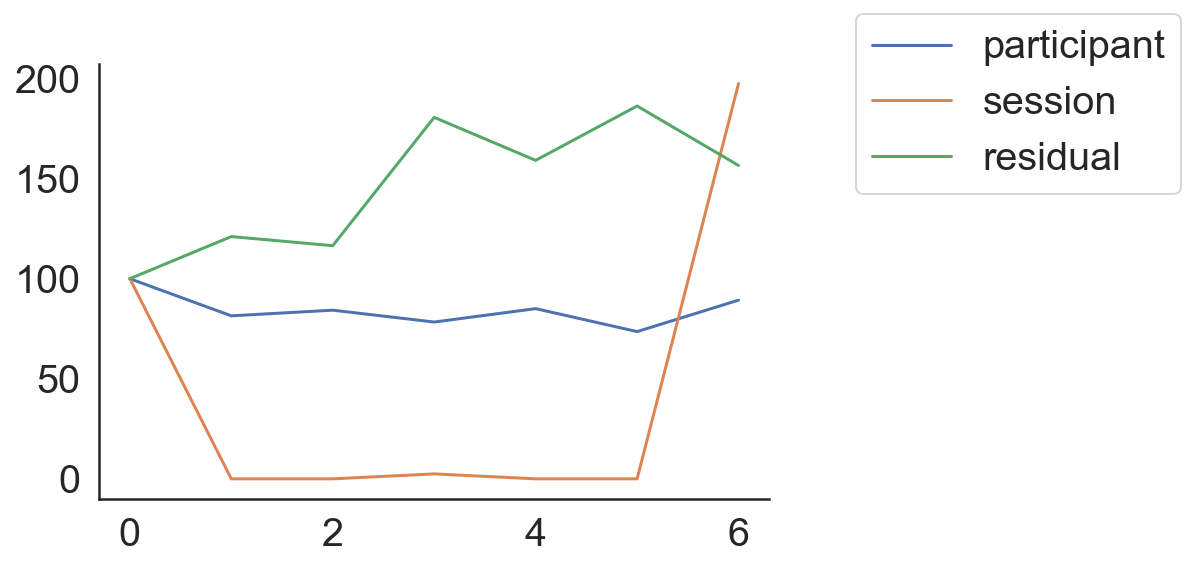

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = True)

### Loss

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



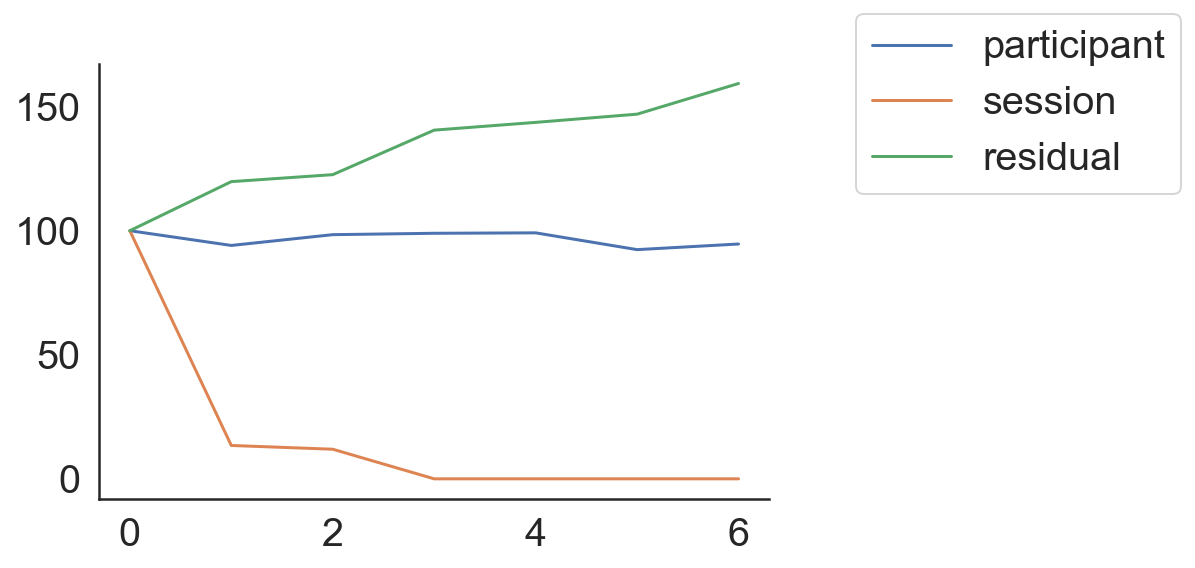

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = True)

### Mixed

N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



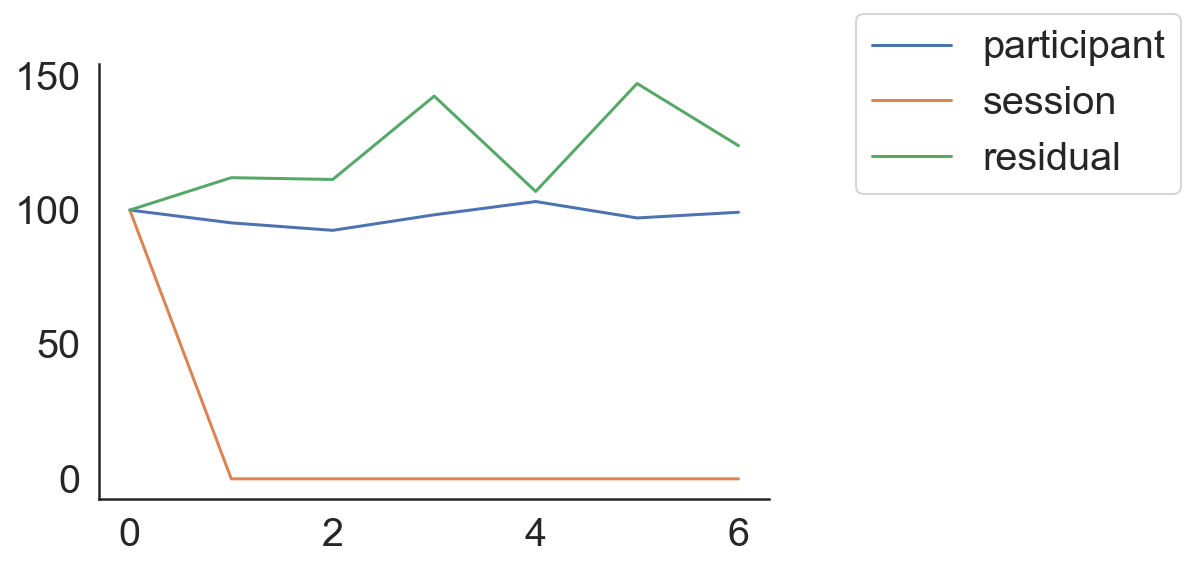

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = True)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



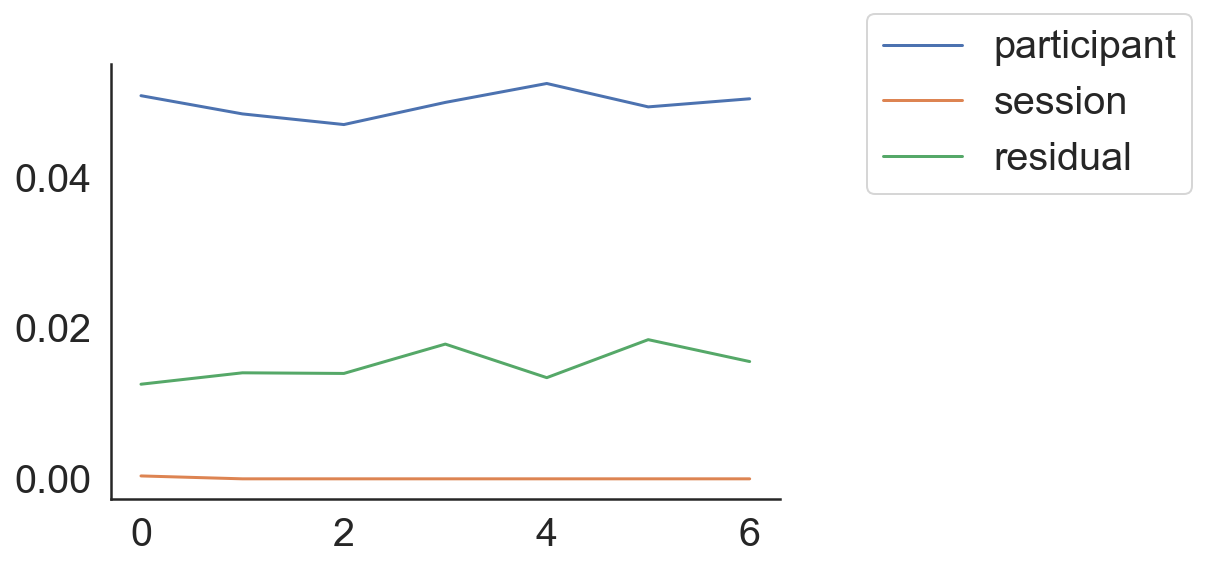

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = False)